#TP03

##Exo1

In [4]:
from keras.datasets import imdb
import numpy as np

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print(train_data.shape, test_data.shape)

(25000,) (25000,)


In [5]:
print(train_data[0])
print(set(train_labels))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
{0, 1}


In [6]:
len(train_data[1])

189

##Exo2

In [7]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

In [8]:
# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

##Exo3

In [9]:
import tensorflow as tf
from tensorflow import keras
original_model = keras.Sequential([
    keras.layers.Dense(16, activation="relu", input_shape=(10000,)),
    keras.layers.Dense(16, activation = "relu"),
    keras.layers.Dense(1,activation='sigmoid')
])
original_model.compile(optimizer = "rmsprop",loss='binary_crossentropy', metrics=['acc'])


##Exo4

In [10]:
smaller_model = keras.Sequential([
    keras.layers.Dense(4, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(4, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
smaller_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

##Exo5

In [11]:
original_hist = original_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 6s 108ms/step - loss: 0.4812 - acc: 0.8106 - val_loss: 0.3528 - val_acc: 0.8776
Epoch 2/20
49/49 [==============================] - 3s 59ms/step - loss: 0.2789 - acc: 0.9016 - val_loss: 0.2882 - val_acc: 0.8874
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2157 - acc: 0.9225 - val_loss: 0.2793 - val_acc: 0.8884
Epoch 4/20
49/49 [==============================] - 3s 60ms/step - loss: 0.1819 - acc: 0.9357 - val_loss: 0.2869 - val_acc: 0.8851
Epoch 5/20
49/49 [==============================] - 3s 58ms/step - loss: 0.1554 - acc: 0.9463 - val_loss: 0.3178 - val_acc: 0.8764
Epoch 6/20
49/49 [==============================] - 4s 73ms/step - loss: 0.1357 - acc: 0.9529 - val_loss: 0.3138 - val_acc: 0.8794
Epoch 7/20
49/49 [==============================] - 4s 79ms/step - loss: 0.1211 - acc: 0.9582 - val_loss: 0.3557 - val_acc: 0.8701
Epoch 8/20
49/49 [==============================] - 4s 78ms/step - loss: 0.1073 - 

##Exo6

In [12]:
smaller_hist = smaller_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 90ms/step - loss: 0.6045 - acc: 0.7469 - val_loss: 0.5172 - val_acc: 0.8457
Epoch 2/20
49/49 [==============================] - 3s 60ms/step - loss: 0.4317 - acc: 0.8753 - val_loss: 0.3912 - val_acc: 0.8730
Epoch 3/20
49/49 [==============================] - 2s 45ms/step - loss: 0.3242 - acc: 0.8962 - val_loss: 0.3302 - val_acc: 0.8805
Epoch 4/20
49/49 [==============================] - 2s 46ms/step - loss: 0.2625 - acc: 0.9114 - val_loss: 0.2938 - val_acc: 0.8880
Epoch 5/20
49/49 [==============================] - 3s 65ms/step - loss: 0.2241 - acc: 0.9216 - val_loss: 0.2831 - val_acc: 0.8878
Epoch 6/20
49/49 [==============================] - 2s 51ms/step - loss: 0.1985 - acc: 0.9305 - val_loss: 0.2768 - val_acc: 0.8899
Epoch 7/20
49/49 [==============================] - 3s 56ms/step - loss: 0.1793 - acc: 0.9374 - val_loss: 0.2814 - val_acc: 0.8874
Epoch 8/20
49/49 [==============================] - 3s 59ms/step - loss: 0.1635 - a

##Exo7

In [13]:
original_hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [14]:
epochs = range(1, 21)
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_hist.history['val_loss']

original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_hist.history['loss']

original_val_acc = original_hist.history['val_acc']
smaller_model_val_acc = smaller_hist.history['val_acc']

original_train_acc = original_hist.history['acc']
smaller_model_train_acc = smaller_hist.history['acc']

##Exo8

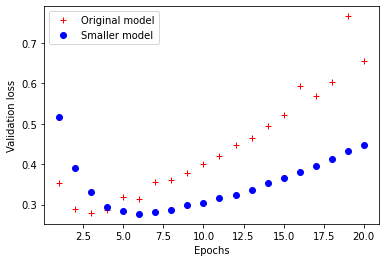

In [15]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(epochs, original_val_loss, 'r+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

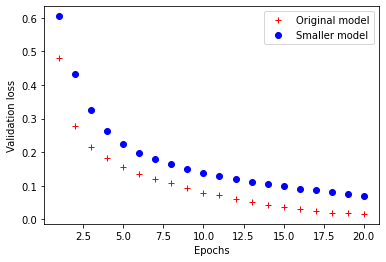

In [16]:
# b+ is for "blue cross"
plt.plot(epochs, original_train_loss, 'r+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

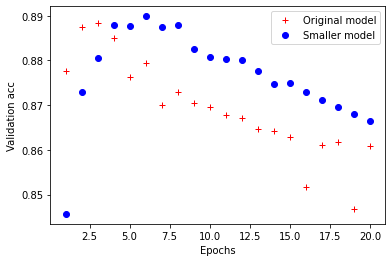

In [17]:
# b+ is for "blue cross"
plt.plot(epochs, original_val_acc, 'r+', label='Original model')
# "bo" is for "blue dot"
plt.plot(epochs, smaller_model_val_acc, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation acc')
plt.legend()

plt.show()

##Exo9

In [18]:
bigger_model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(10000,)),
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
bigger_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

##Exo10

In [19]:
bigger_hist = bigger_model.fit(x_train, y_train,
                                   epochs=1, #mettre 60
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

49/49 [==============================] - 24s 459ms/step - loss: 0.4997 - acc: 0.7681 - val_loss: 0.3284 - val_acc: 0.8649


##Exo12
(autre question plus tard)

In [20]:
l2_model = keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(10000,),kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(16, activation='relu',kernel_regularizer= keras.regularizers.l2(0.001)),
    keras.layers.Dense(1, activation='sigmoid')
])
l2_model.compile(optimizer='rmsprop',
                       loss= 'binary_crossentropy',
                       metrics=['acc'])

##Exo13

In [21]:
l2_hist = l2_model.fit(x_train, y_train,
                                   epochs=20,
                                   batch_size=512,
                                   validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 5s 97ms/step - loss: 0.5415 - acc: 0.7997 - val_loss: 0.4310 - val_acc: 0.8491
Epoch 2/20
49/49 [==============================] - 3s 57ms/step - loss: 0.3420 - acc: 0.8988 - val_loss: 0.3431 - val_acc: 0.8877
Epoch 3/20
49/49 [==============================] - 3s 65ms/step - loss: 0.2815 - acc: 0.9172 - val_loss: 0.3408 - val_acc: 0.8828
Epoch 4/20
49/49 [==============================] - 4s 86ms/step - loss: 0.2534 - acc: 0.9266 - val_loss: 0.3285 - val_acc: 0.8879
Epoch 5/20
49/49 [==============================] - 4s 86ms/step - loss: 0.2375 - acc: 0.9320 - val_loss: 0.3441 - val_acc: 0.8816
Epoch 6/20
49/49 [==============================] - 5s 103ms/step - loss: 0.2250 - acc: 0.9389 - val_loss: 0.3432 - val_acc: 0.8827
Epoch 7/20
49/49 [==============================] - 3s 62ms/step - loss: 0.2164 - acc: 0.9410 - val_loss: 0.3618 - val_acc: 0.8764
Epoch 8/20
49/49 [==============================] - 3s 61ms/step - loss: 0.2073 - 

##Exo14

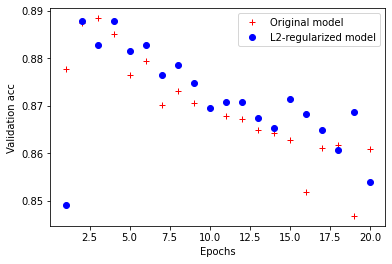

In [23]:
l2_model_val_acc = l2_hist.history['val_acc']
plt.plot(epochs, original_val_acc, 'r+', label='Original model')
plt.plot(epochs, l2_model_val_acc, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation acc')
plt.legend()
plt.show()

##Exo15

In [24]:
dpt_model = keras.Sequential([
    keras.layers. Dense(16, activation='relu', input_shape= (10000, )), 
    keras. layers.Dropout (0.5),
    keras.layers.Dense (16, activation='relu'), 
    keras.layers.Dropout (0.5), 
    keras.layers.Dense(1, activation='sigmoid')
])
dpt_model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy', 
                  metrics=['acc'])

##Exo16

In [25]:
dpt_hist = dpt_model.fit(x_train, y_train,
                              epochs=20, 
                              batch_size=512, 
                              validation_data=(x_test, y_test))

Epoch 1/20
49/49 [==============================] - 7s 128ms/step - loss: 0.5952 - acc: 0.6837 - val_loss: 0.4652 - val_acc: 0.8632
Epoch 2/20
49/49 [==============================] - 3s 58ms/step - loss: 0.4592 - acc: 0.8196 - val_loss: 0.3615 - val_acc: 0.8796
Epoch 3/20
49/49 [==============================] - 3s 63ms/step - loss: 0.3774 - acc: 0.8670 - val_loss: 0.3179 - val_acc: 0.8864
Epoch 4/20
49/49 [==============================] - 3s 65ms/step - loss: 0.3264 - acc: 0.8947 - val_loss: 0.2912 - val_acc: 0.8869
Epoch 5/20
49/49 [==============================] - 3s 59ms/step - loss: 0.2878 - acc: 0.9105 - val_loss: 0.2848 - val_acc: 0.8858
Epoch 6/20
49/49 [==============================] - 3s 61ms/step - loss: 0.2562 - acc: 0.9208 - val_loss: 0.2884 - val_acc: 0.8862
Epoch 7/20
49/49 [==============================] - 2s 45ms/step - loss: 0.2323 - acc: 0.9275 - val_loss: 0.3001 - val_acc: 0.8840
Epoch 8/20
49/49 [==============================] - 3s 58ms/step - loss: 0.2168 - 

##Exo17


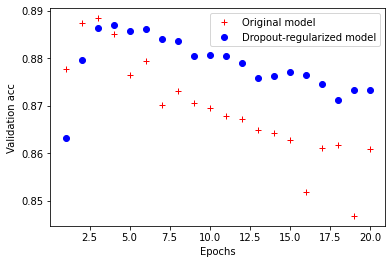

In [26]:
dpt_model_val_acc = dpt_hist.history['val_acc']
plt.plot(epochs, original_val_acc, 'r+', label='Original model')
plt.plot(epochs, dpt_model_val_acc, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation acc')
plt. legend ()
plt.show()